# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

dimulai dengan menentukan titik awal yang dipilih secara acak mengikuti centroid (posisi rata-rata dari keseluruhan titik data). untuk menentukan titik awal masing-masing klaster atau kelompok.
Agar titik awal semakin presisi dan centroid tetap stabil, maka algoritma akan mulai melakukan perhitungan berulang. Proses tersebut akan berhenti secara otomatis jika centroid telah stabil (tidak terjadi perubahan nilai) atau karena jumlah iterasi yang ditentukan di awal proses sudah tercapai.







---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

dff = df.rename(columns={'Skor Belanja (1-100)': 'Skor_Belanja'})
dff

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor_Belanja
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
#code here
# Melakukan check dataset
# Melihat detail statistik dasar
display(dff.describe())

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor_Belanja
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


In [3]:
# Melakukan check dataset
# mendeteksi nilai yang hilang
display(dff.isna().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor_Belanja                  4
dtype: int64

In [4]:
# Melakukan check dataset
# Handling missing value dengan menggunakan method ='ffill'
df1 = dff.fillna(method='ffill')
print(df1.isna().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor_Belanja                  0
dtype: int64


In [5]:
# Melakukan check dataset
# buat dataset baru dari column yang kita butuhkan

df2 = df1[['Umur', 'Skor_Belanja']].copy()
df2

,Umur,Skor_Belanja
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0
248,32.0,86.0


In [6]:
# Handling outlier menggunakan metode Interquartile range

from scipy import stats

IQR = stats.iqr(df2, interpolation = 'midpoint')
IQR

28.5

In [7]:
# Lakukan rescaling data menggunakan StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

x_array = np.array(df2)
scaler = StandardScaler()
scale_data = scaler.fit_transform(x_array)
df3 = pd.DataFrame(scale_data, columns=['Umur', 'Skor_Belanja'])
df3

,Umur,Skor_Belanja
0,-1.382782,-0.395939
1,-1.241768,1.083022
2,-1.312275,-1.557980
3,-1.100755,0.942168
4,-0.536699,-0.360726
...,...,...
245,1.437496,-1.276273
246,-0.254671,1.399942
247,-0.113657,-0.642432
248,-0.466192,1.259089


<module 'matplotlib.pyplot' from 'c:\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

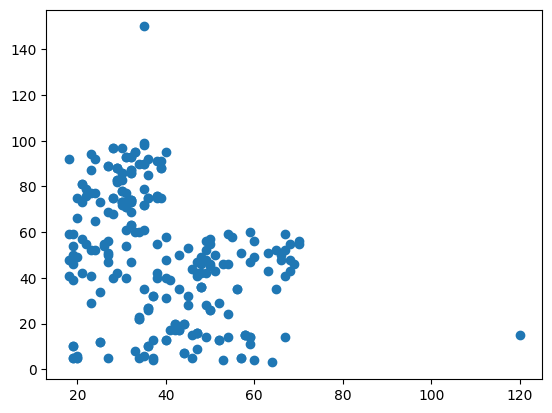

In [8]:
# plot scatter
from matplotlib import pyplot as plt

plt.scatter(dff.Umur, dff.Skor_Belanja)
plt

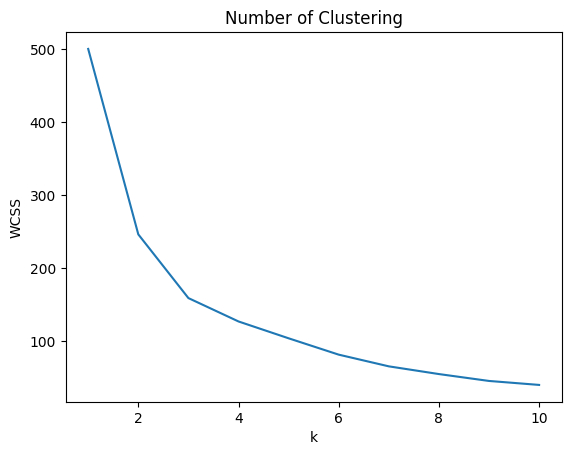

In [9]:
# Clustering menggunakan kmeans clustering

from sklearn.cluster import KMeans

sum_of_squares_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k).fit(scale_data)
    sum_of_squares_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squares_distances)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Number of Clustering')
plt.show()

In [10]:
# k = 2
kmeans_label2 = KMeans(n_clusters = 2, random_state = 16).fit(scale_data)
df2['label2'] = kmeans_label2.labels_
# display(df2)

# k = 3
kmeans_label3 = KMeans(n_clusters = 3, random_state = 16).fit(scale_data)
df2['label3'] = kmeans_label3.labels_
display(df2)

# silhouette score label k = 2
from sklearn.metrics import silhouette_score
ss_label2 = silhouette_score(df2[['Umur', 'Skor_Belanja']], labels=df2['label2'], metric='euclidean')
display(f'silhouette k = 2 = {ss_label2}')

# silhouette score label k = 3
ss_label3 = silhouette_score(df2[['Umur', 'Skor_Belanja']], labels=df2['label3'], metric='euclidean')
display(f'silhouette k = 3 = {ss_label3}')

,Umur,Skor_Belanja,label2,label3
0,19.0,39.0,0,2
1,21.0,81.0,0,0
2,20.0,6.0,1,2
3,23.0,77.0,0,0
4,31.0,40.0,0,2
...,...,...,...,...
245,59.0,14.0,1,1
246,35.0,90.0,0,0
247,37.0,32.0,1,2
248,32.0,86.0,0,0


'silhouette k = 2 = 0.47662858319091367'

'silhouette k = 3 = 0.42680547036748595'

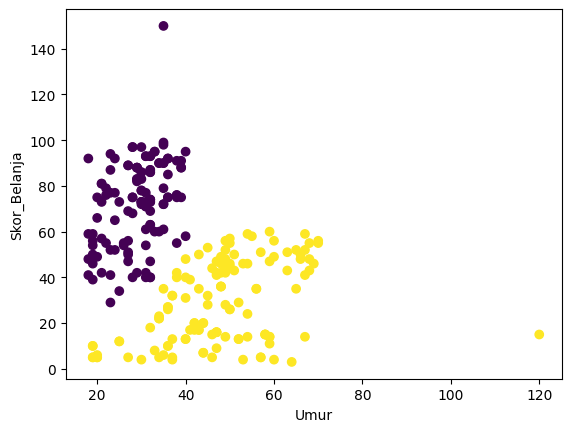

In [11]:
# scatter k = 2

plt.scatter(df2.Umur, df2.Skor_Belanja, c=df2.label2)
plt.xlabel('Umur')
plt.ylabel('Skor_Belanja')
plt.show()

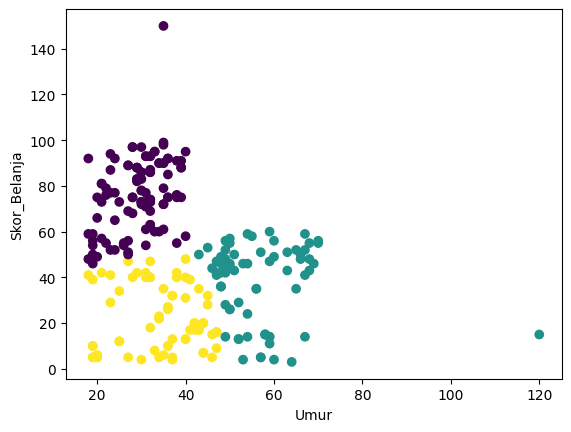

In [12]:
# scatter k = 3

plt.scatter(df2.Umur, df2.Skor_Belanja, c=df2.label3)
plt.xlabel('Umur')
plt.ylabel('Skor_Belanja')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini :

k = 2

Dari grafik sebar yang ditunjukan, semakin tinggi usia pelanggan akan semakin tinggi pula kebutuhan belanja (Skor)